Посмотрим на кросс-валидацию на датасете определения спам писем (0 - не спам, 1 - спам). Будем применять Байесовский наивный классификатор, как делали это наши отцы на заре интернета

In [72]:
from yellowbrick.datasets import load_spam
import pandas as pd

In [73]:
X, y = load_spam()
y.value_counts()

0    2788
1    1812
Name: is_spam, dtype: int64

In [74]:
df = pd.concat([X, y], axis=1)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [75]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Возможно, мне когда-то мне будет не лень и я лучше подготовлю данные, а пока сделаем только стандартизацию (Байесовский алгоритм может работать и не со стандартизованными данными, но нам не сложно и это хуже точно не сделает). Оценивать будем на всех стандартных метриках

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
pipeline = Pipeline([("scaler", StandardScaler()), ("naive", GaussianNB())])
naive_bayes = GaussianNB()

Чтобы оценить модель, вы обучаете её на тренировочном множестве, а результаты измеряете на тестовом. У sklearn по дефолту выставлен параметр shuffle=True, то есть перед разделением на тренировочное и тестовое множества происходит перемешивание семплов (и для воспроизводимости такого разбиения нужно фиксировать random_state).

Здесь сразу хочется отметить, что, если у вас достаточно данных, лучше всегда предусматривать также валидационное множество:


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


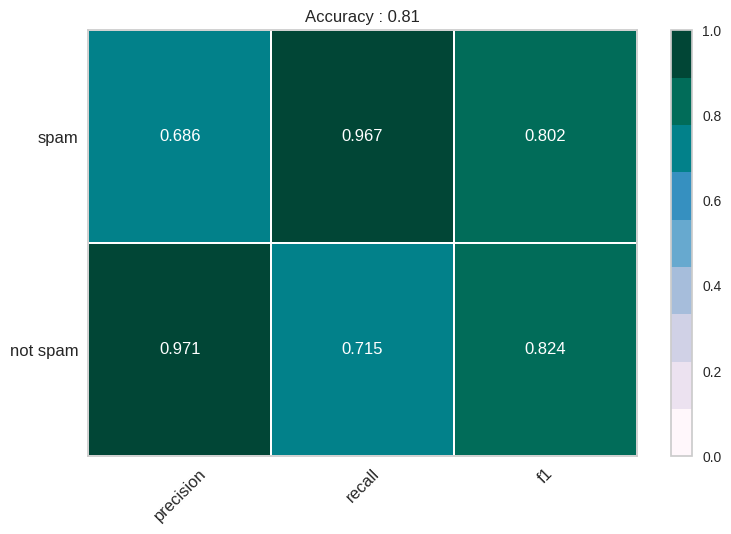

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


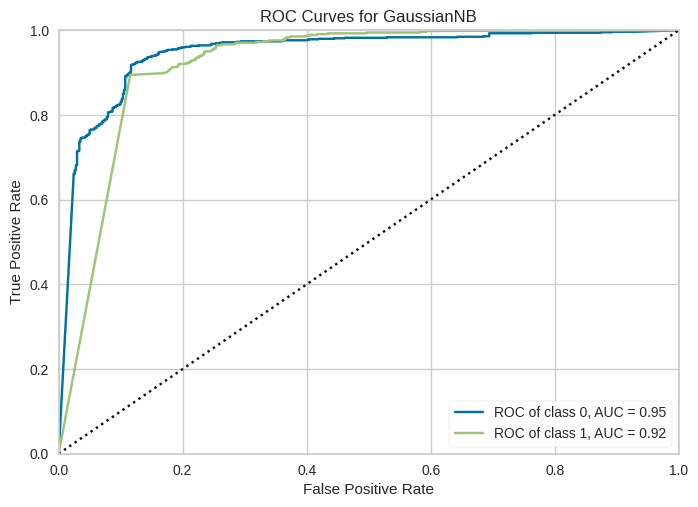

<Axes: title={'center': 'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [77]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.3, random_state =1)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
visualizer_report = ClassificationReport(pipeline, classes=["not spam", "spam"], cmap="PuBuGn")#рисуем таблицу со всеми оценками классификации
visualizer_report.fit(X_train, y_train)
visualizer_report.score(X_test , y_test)
visualizer_report.title = f"Accuracy : {round(accuracy_score(y_test, y_pred), 2)}"
visualizer_report.show()
visualizer_roc = ROCAUC(pipeline, micro=False , macro=False)#рисуем ROC кривую
visualizer_roc.fit(X_train , y_train)
visualizer_roc.score(X_test , y_test)
visualizer_roc.show()

Из этих метрик можно понять, что наш алгоритм бывает определяет не спам сообщения как спам. Из ROC графика видно, что в целом модель работает хорошо и вероятности классов распределены равномерно, только при достижения порога примерно 60% 1 класс начинает побольше ошибаться

Можно еще стратифицировать (т.е. разбивать классы в изначальных пропорциях) и при Hold-out кросс-валидации:
На помощь в такой ситуации может прийти стратификация: разбиение на трейн и тест, сохраняющее соотношение классов, представленное в исходном датасете. В sklearn такое разбиение можно получить с помощью параметра stratify:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

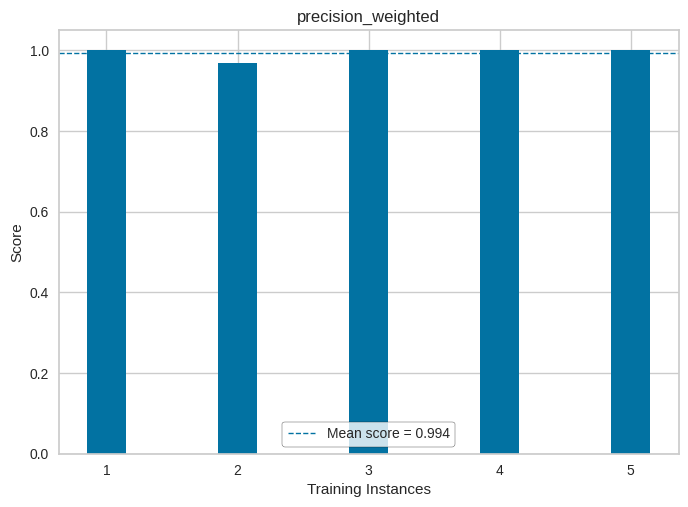

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined 

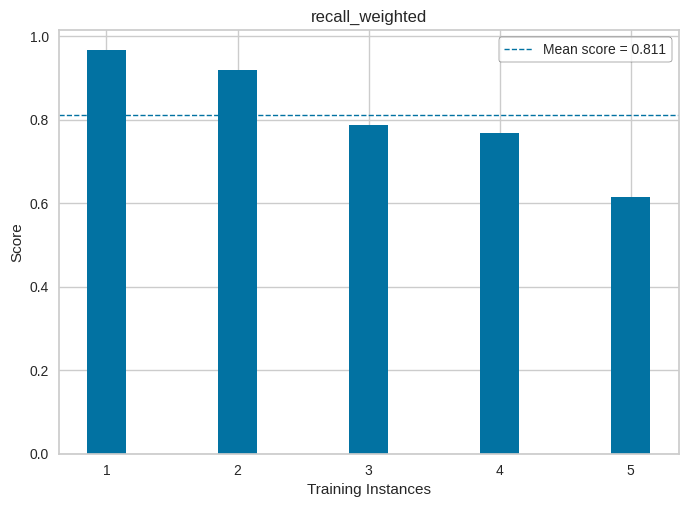

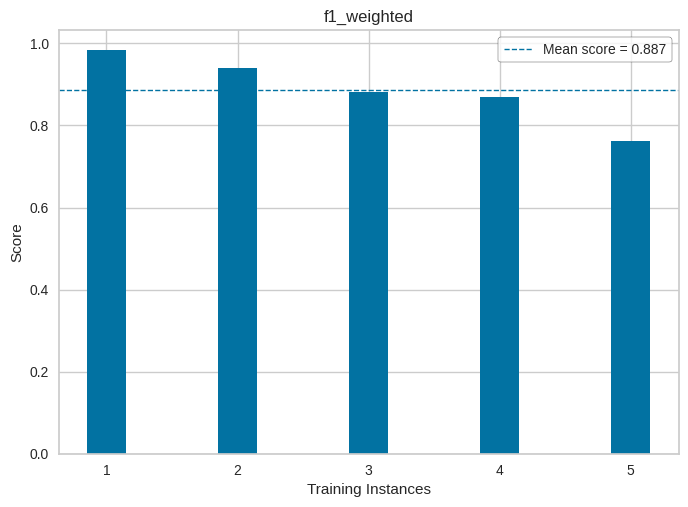

In [89]:
# 2. K-fold cross -validation
from sklearn.model_selection import cross_val_score , KFold, cross_val_predict
from yellowbrick.model_selection import CVScores
metrics = ['precision_weighted','recall_weighted','f1_weighted']
kf = KFold(n_splits =5)
for i in metrics:
  visualizer = CVScores(pipeline, cv=kf, scoring=i)
  visualizer.fit(X, y)
  visualizer.title = i
  visualizer.show()

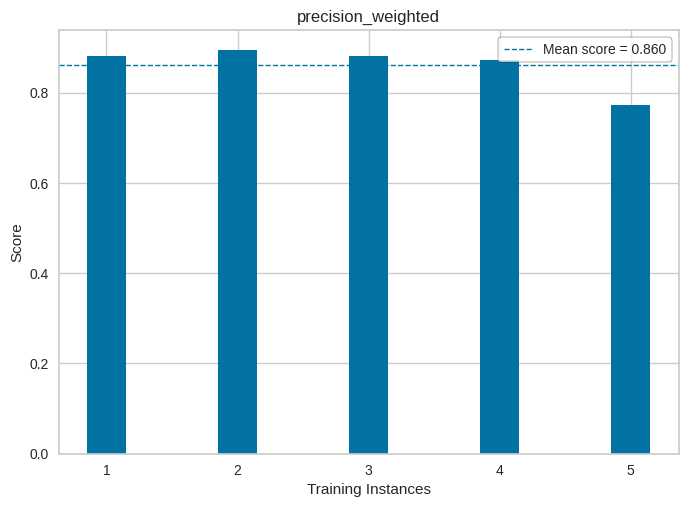

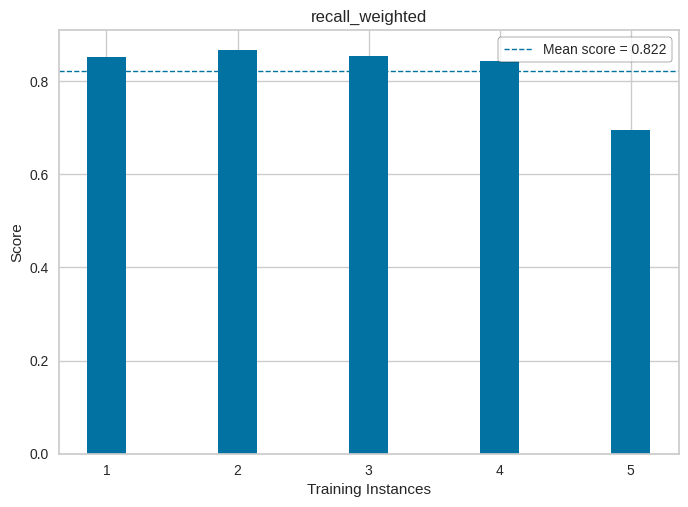

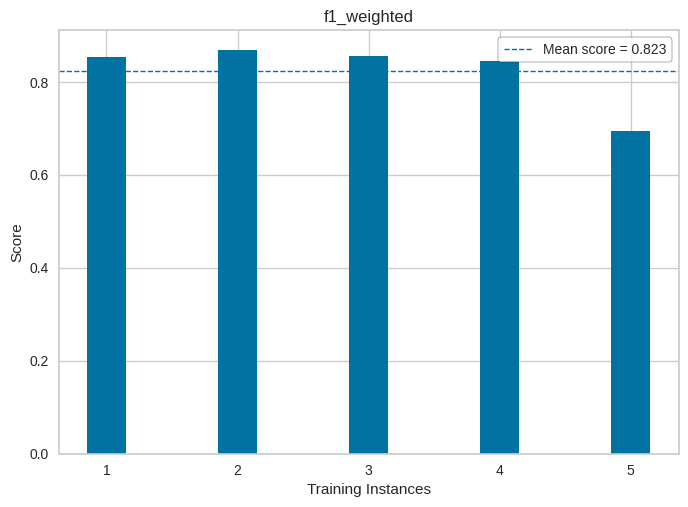

In [90]:
# 3. Stratified k-fold cross -validation
from sklearn.model_selection import cross_val_score , StratifiedKFold, cross_val_predict
from yellowbrick.model_selection import CVScores
metrics = ['precision_weighted','recall_weighted','f1_weighted']
kf = StratifiedKFold(n_splits =5)
for i in metrics:
  visualizer = CVScores(pipeline, cv=kf, scoring=i)
  visualizer.fit(X, y)
  visualizer.title = i
  visualizer.show()

In [95]:
# 4. Leave -One -Out Cross -Validation
from sklearn.model_selection import LeaveOneOut
LOOCV=LeaveOneOut ()
score = cross_val_score(pipeline , X, y, cv=LOOCV)
sum(score)/len(y)

0.8182608695652174

есть еще кросс-валидация на временных рядах, когда нам важно разбивать выборку по времени: тренировочные данные должны идти до валидационных, а валидационные — до тестовых. С учётом этих особенностей фолды в кросс-валидации для временных рядов располагаются вдоль временной оси так, как показано на следующей картинке:
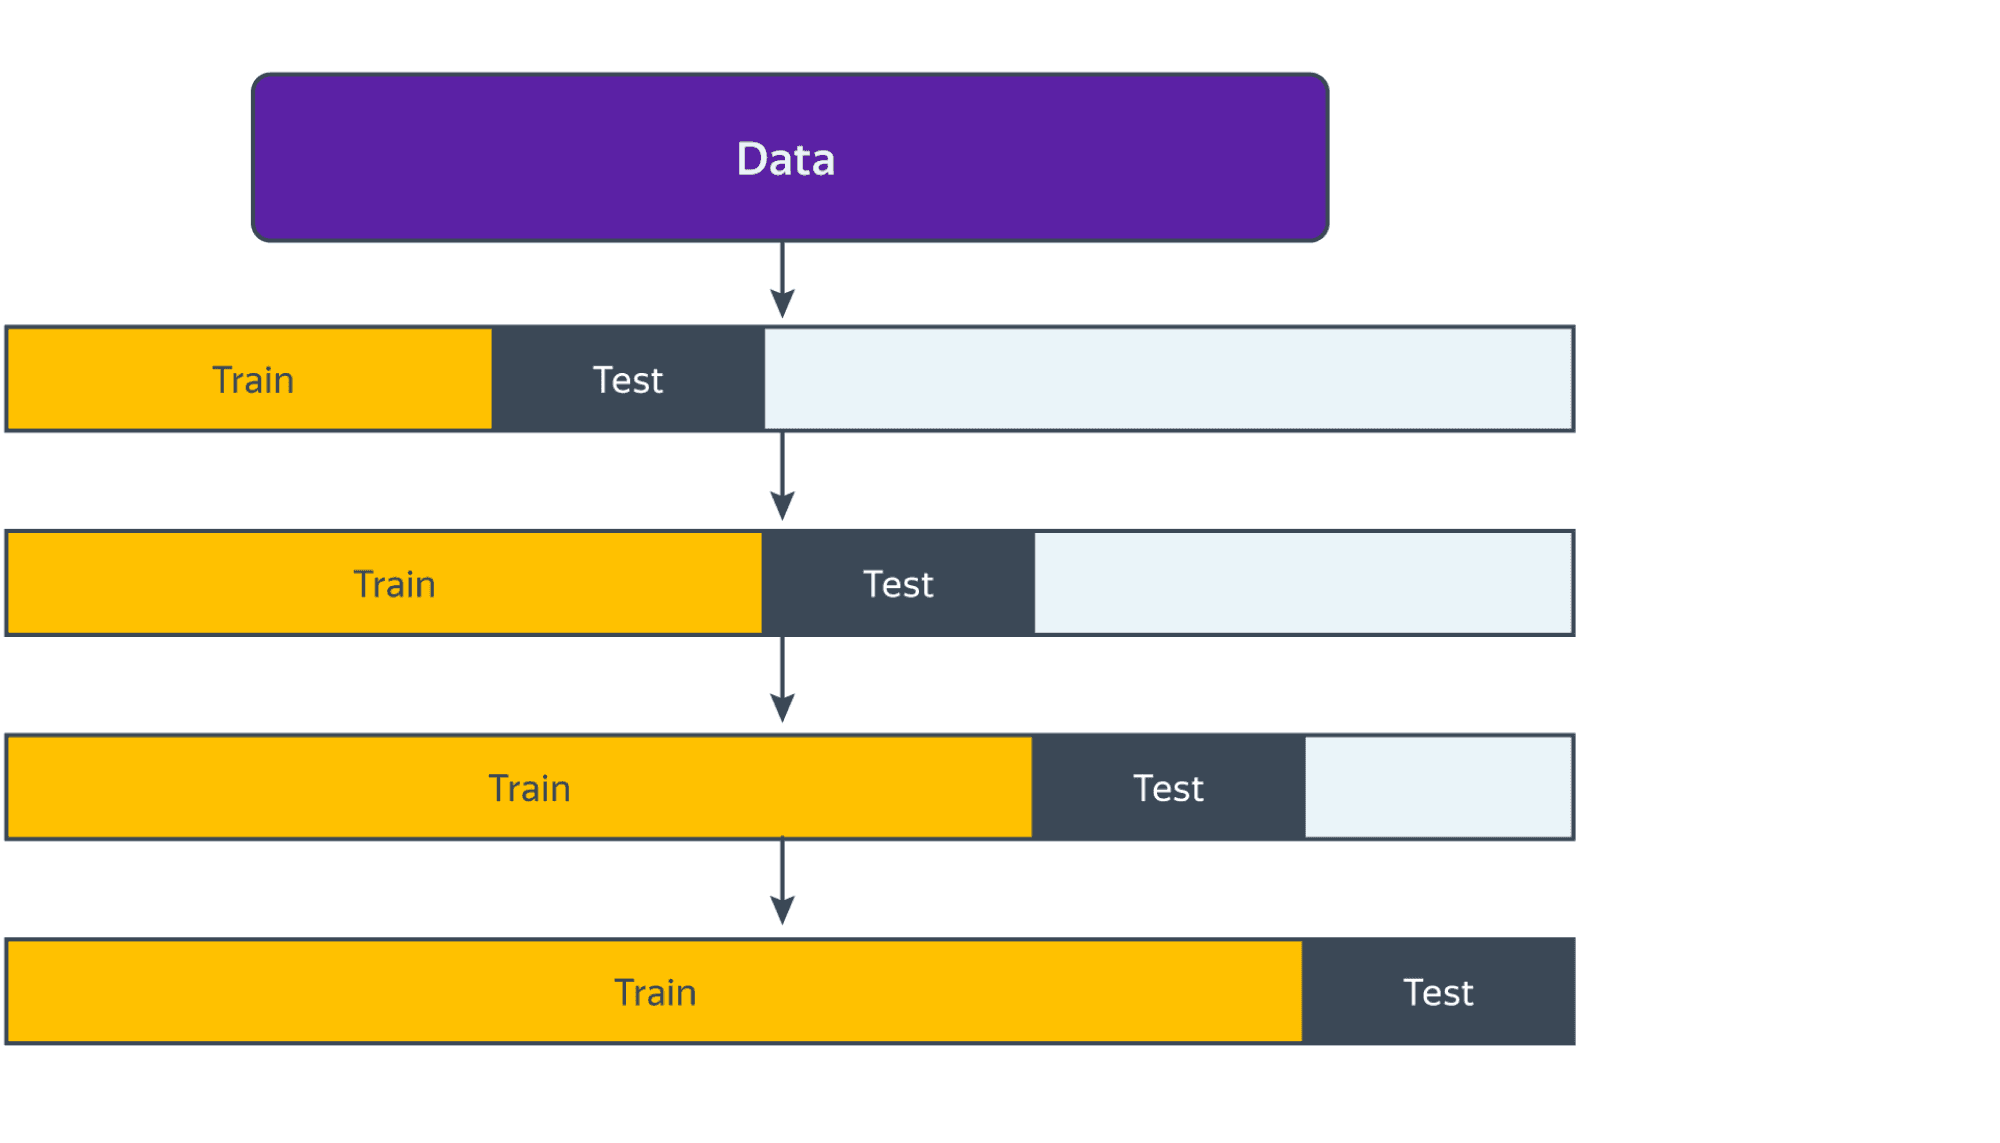

Код:

tscv = TimeSeriesSplit()
print(tscv)

for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

ебанута статья на эту тему
https://habr.com/ru/company/ods/blog/327242/